In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model




In [3]:
# Load and preprocess the MNIST dataset
file_path = 'mnist_784_csv.csv'  # replace with your actual file path
mnist_data = pd.read_csv(file_path)

In [4]:
mnist_features = mnist_data.drop(columns=mnist_data.columns[0], axis=1)
mnist_images = mnist_features.values / 255.0

In [5]:
mnist_images = mnist_images.reshape(-1, 28, 28, 1)

In [6]:
x_train, x_test = train_test_split(mnist_images, test_size=0.2, random_state=42)

In [7]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [8]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [9]:
input_img = Input(shape=(28, 28, 1))

In [10]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

In [11]:
# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [12]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [13]:
autoencoder.fit(x_train_noisy, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 30s 116ms/step - loss: 0.3653 - val_loss: 0.1385
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 27s 124ms/step - loss: 0.1340 - val_loss: 0.1250
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 41s 122ms/step - loss: 0.1236 - val_loss: 0.1192
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 42s 125ms/step - loss: 0.1185 - val_loss: 0.1157
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 28s 126ms/step - loss: 0.1155 - val_loss: 0.1133
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 27s 125ms/step - loss: 0.1132 - val_loss: 0.1113
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 29s 133ms/step - loss: 0.1115 - val_loss: 0.1099
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 28s 126ms/step - loss: 0.1100 - val_loss: 0.1088
Epoch 9/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 29s 133ms/step - loss: 0.1087 - val_loss: 0.1077
Epoch 10/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 32s 144ms/step - loss: 0.1076 - val_loss: 0.1067
Epoch 11/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 31s 139ms/step - loss: 0.1068 - val_loss: 0.1059
Epoch 12/50
219/219

In [14]:
denoised_imgs = autoencoder.predict(x_test_noisy)

438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


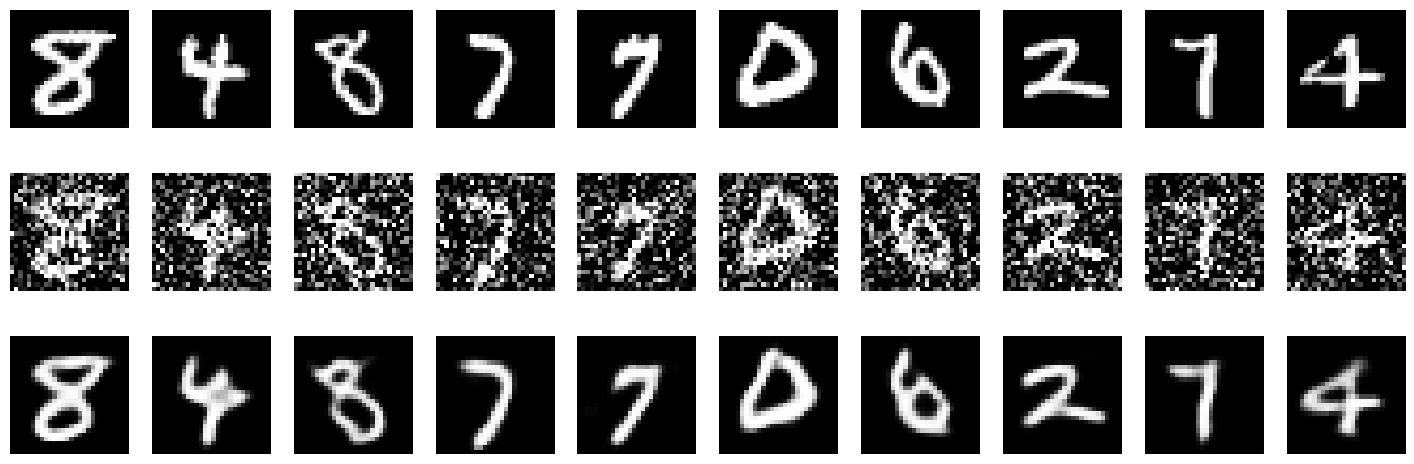

In [15]:
n = 10  # number of images to display
plt.figure(figsize=(18, 6))
for i in range(n):
    # Display original images (First row)
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    # Display noisy images (Second row)
    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    # Display denoised images (Third row)
    ax = plt.subplot(3, n, i + 2 * n + 1)
    plt.imshow(denoised_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()
